<div style="border: 5px solid purple; padding: 15px; margin: 5px">
<b> Reviewer's comment</b>
    
Hi Elizabeth! Congratulations on submitting Time Series project! 🎉 Here I will be using the standard color marking:
    

   
    
<div style="border: 5px solid green; padding: 15px; margin: 5px">

Great solutions and ideas that can and should be used in the future are in green comments. Some of them are: 
    
    
- You have successfully prepared the subsets. It is important to split the data correctly in order to ensure there's no intersection;    
    
    
- You have successfully investigated the data we have; 
    
    
    
- It's great that you used `statsmodels` to analyze time series as it provides comprehensive summaries that can be useful when we need to make data-driven decisions;



- Trained and compared several models. It is not enough to just train a model. We also need to analyze the results and compare different models. Very good! 

    
    
- Used advanced models such as ARIMA;
    


- Tested the best model;


  
- Wrote an excellent conclusion! A well-written conclusion shows how the project met its objectives and provides a concise and understandable summary for those who may not have been involved in the details of the project. Good job! 

</div>
    
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project. I've left several recommendations throughout the project. 
    
</div>
<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Issues that must be corrected to achieve accurate results are indicated in red comments. Please note that the project cannot be accepted until these issues are resolved. However, there are no such issues, great job! 
    
    
    
    
</div>         
<hr>
    
<font color='dodgerblue'>**To sum up:**</font> thank you very much for submitting the project! You did a fantastic job here. You have successfully trained several models and analyzed time series, which is great! The project is well-structured and meets the objective: a forecasting model with RMSE < 48 was successfully built and tested. The results are represented and interpreted effectively. I do not have any questions, so I can accept the project now. 


<hr> 
    
✍️ Here's a [link](https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/) to the article about the autoregression models that you may find interesting. 
    
    
[Here](https://medium.com/@soumyachess1496/cross-validation-in-time-series-566ae4981ce4) you can read about cross-validation with time series.
    

 
If you are interested in this topic, please take a look at the small [Time Series Course](https://www.kaggle.com/learn/time-series) on Kaggle. There are just several lessons there, and in the end of this course you will apply your knowledge on the sales dataset that is provided for the ongoing [Store Sales Time Series Forecasting Competition](https://www.kaggle.com/competitions/store-sales-time-series-forecasting) with no rewards except for knowledge :) You can use their dataset for your practice and you can submit your notebook to run the model on the hidden test subset.     
    
 
    
I also recommend the [Prophet](https://facebook.github.io/prophet/docs/quick_start.html) library developed by Meta. It's a really great tool for working with time series. 

    
Another great tool is [Optuna](https://optuna.readthedocs.io), which implements smart tuning using the Bayesian optimization with pruning. Instead of blindly trying all combinations like grid or random search, optuna uses a probabilistic model that learns which parameter values led to good results and predicts which new values are more likely to improve the objective. So it uses a very smart way to explore the hyperparameters space. It estimates which hyperparameter combinations are likely to perform well, then suggests new trials based on this evolving model. During each trial, it evaluates performance and optionally prunes underperforming runs quite early to focus computation on the most promising areas of the search space. However, I am not sure whether you will be able to install optuna here, so you probably need to test it in your local environment using some IDE. You can refer to this pretty good [notebook](https://www.kaggle.com/code/vipin20/arima-sarimax-exponential-smoothing-using-optuna).

<hr>

Congratulations and good luck! 
</div>

# Swift Lift Taxi Forecast

Sweet Lift Taxi company has collected historical data on taxi orders at airports. To attract more drivers during peak hours, we need to predict the amount of taxi orders for the next hour. Build a model for such a prediction.

The RMSE metric on the test set should not be more than 48.

## Project instructions

1. Download the data and resample it by one hour.
2. Analyze the data.
3. Train different models with different hyperparameters. The test sample should be 10% of the initial dataset. 
4. Test the data using the test sample and provide a conclusion.

## Data description

The data is stored in file `taxi.csv`. The number of orders is in the '*num_orders*' column.

## Preparation

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import arma_order_select_ic
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.graphics.tsaplots import plot_pacf

In [2]:
#import dataset

df = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])
df.info()
display(df.sample(5))

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


,num_orders
datetime,
2018-04-01 23:00:00,12
2018-05-20 01:20:00,14
2018-04-25 12:30:00,5
2018-03-05 18:10:00,13
2018-05-03 12:50:00,5


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
    
The data was successfully read, good!     
</div>


On quick review of the data, it seems that there are no missing values, but we can double check this.  We also made the datetime column our indexing column so there is no need to worry about the data type.  We will also want to screen for duplicates.

In [3]:
#check for missing values
print(df.isna().sum())

num_orders    0
dtype: int64


In [4]:
#check for duplicates- must do this for the index rather than the num_orders as there can easily be the same number of taxis ordered at different times
print(df.index.duplicated().sum())

0


It seems that there are no duplicates  or missing values as data is collected in approximately 10 min increaments.  For our model's purposes we will want to regroup the data by hour as we want to predict how many drivers we will need for the next hour.

In [5]:
df.sort_index(inplace=True)
df = df.resample('1H').sum()
df.info()
display(df.sample(5))

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB


,num_orders
datetime,
2018-07-11 07:00:00,28
2018-06-01 14:00:00,48
2018-04-09 01:00:00,119
2018-03-25 05:00:00,12
2018-06-02 17:00:00,48


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
The resampling is correct! We indeed need to use `sum`, not `mean`, since we need to forecast the total number of rides. 
    
</div>

In [6]:
#recheck missing values and duplicated values with resampled data

print(df.isna().sum())
print(df.index.duplicated().sum())

num_orders    0
dtype: int64
0


Now that our data is prepped we can analyze it to improve our understanding and gain insights that will aid in developing our models. 

## Analysis

In [7]:
display(df.head(10))
display(df.tail(10))

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43
2018-03-01 05:00:00,6
2018-03-01 06:00:00,12
2018-03-01 07:00:00,15
2018-03-01 08:00:00,34


,num_orders
datetime,
2018-08-31 14:00:00,133
2018-08-31 15:00:00,116
2018-08-31 16:00:00,197
2018-08-31 17:00:00,217
2018-08-31 18:00:00,207
2018-08-31 19:00:00,136
2018-08-31 20:00:00,154
2018-08-31 21:00:00,159
2018-08-31 22:00:00,223


Since we sorted the data in our data prep, we can look at the beginning and end samples of our data to determine what the timeframe our data set consists of. All of our data falls from March 1st 2018 through August 31st 2018.

<AxesSubplot:xlabel='datetime'>

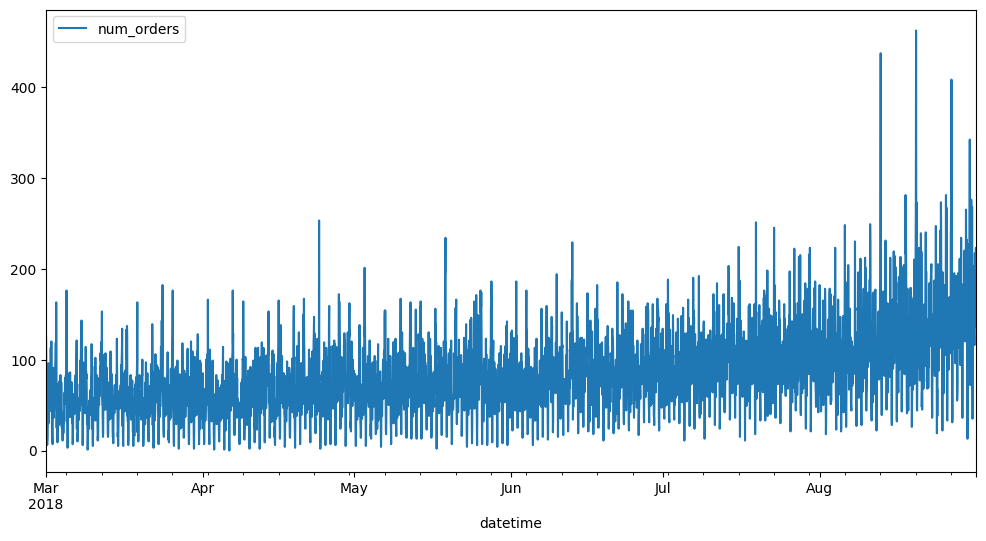

In [8]:
#start with a simple plot to gain understanding of distribution and trends
df.plot(figsize=(12, 6))

This plot is very noisey and hard to read.  We can use rolling mean to help smooth this data and make it easier to understand.

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
    
Agreed. </div>


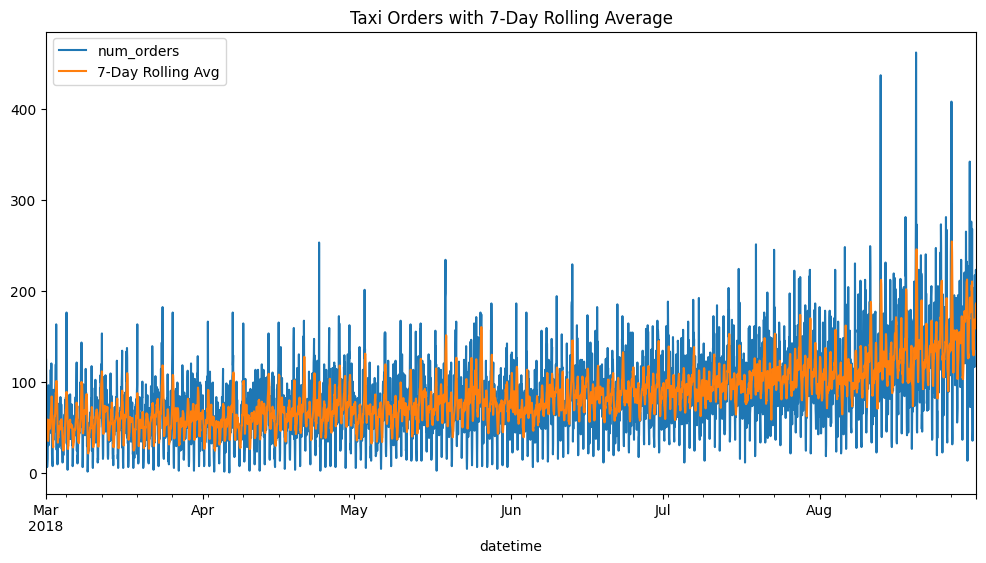

In [9]:
rolling_avg = df['num_orders'].rolling(window=7).mean()
df[['num_orders']].plot(figsize=(12, 6), label='Daily Orders')
rolling_avg.plot(label='7-Day Rolling Avg')
plt.title('Taxi Orders with 7-Day Rolling Average')
plt.legend()
plt.show()

Now we want to get more in depth insights on the trend and seasonality of this data.  This will be important when selecting our models/hyperparameters later on.  Looking at this it seems that our data is stationary, but may require deeper analysis to determine as there is a slight increase toward around August.

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
There's indeed a visible trend by months. However, in the future, also check data from other years if the data is available. The sample size here is too small, so we can't draw conclusions on large timeframes. In this case, the increase in orders might simply be due to the business growth: more clients -> more orders.


</div>

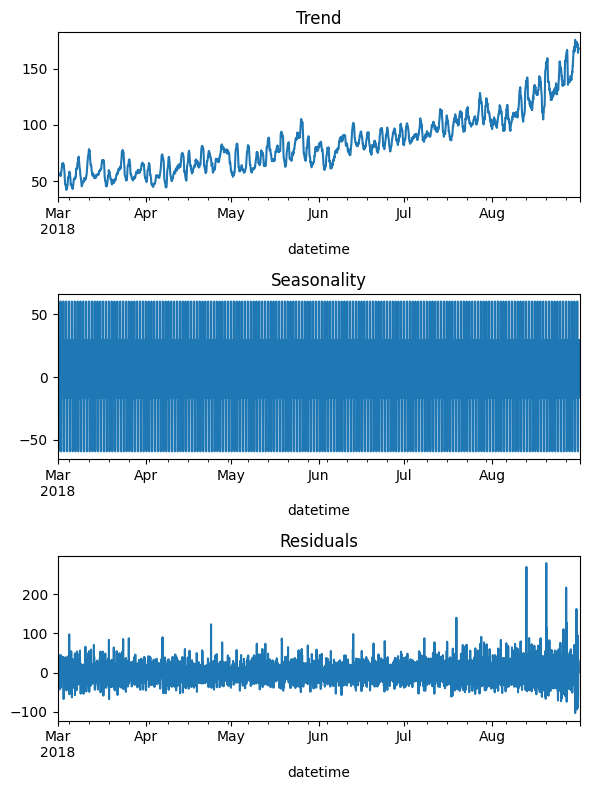

In [10]:
decomposed= seasonal_decompose(df)

plt.figure(figsize=(6,8))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()
plt.show()

Seasonality is very hard to see in this plot as it is broken down by hour over many months.  It may be beneficial to filter this out and get seasonality plots by month.  We can see that the data does slowly trend up as the year goes on, which could indicate overall growth in the company and how many taxi's are being ordered. This also shows that our data set is NONSTATIONARY.

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
`seasonal_decompose` is a great method, well done! 
    


To check stationarity, it's better to use tests. However, stationarity is crucial primarily for time series models based on autoregression and moving averages, such as ARIMA. These models assume that the statistical properties of the series (mean, variance, autocorrelation) remain constant over time.

    
Common ML models, such as Random Forest, do not require stationarity, as they don't rely on it, though it still may be helpful in some cases. </div>

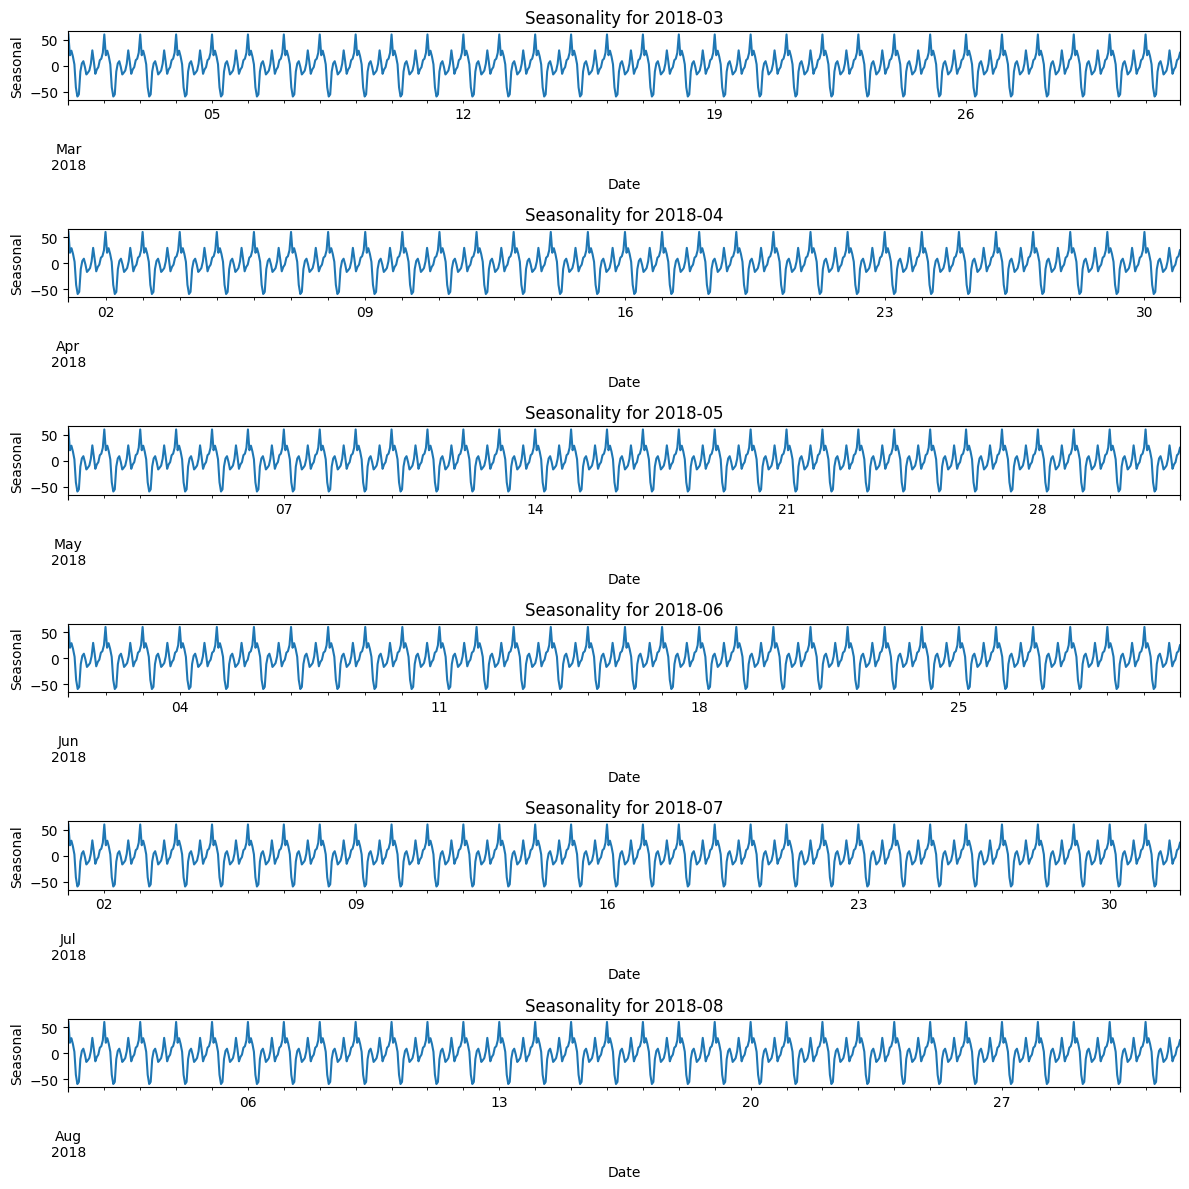

In [11]:
seasonal = decomposed.seasonal

months = ['2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08']

plt.figure(figsize=(12, 12))

for i, month in enumerate(months, 1):
    plt.subplot(len(months), 1, i)
    # Select the month data
    month_data = seasonal[month]
    month_data.plot()
    plt.title(f'Seasonality for {month}')
    plt.xlabel('Date')
    plt.ylabel('Seasonal')

plt.tight_layout()
plt.show()

As this shows there are very clear spikes and dips in times when taxis are ordered and it appears to be relatively consistent across each month of data that we have, so it seems that the time of year does not impact it as much as the day of the week or the time of day may.  To get an idea of this we can look at a random week during a month and see the seasonality across that, and then select a random day and look at the seasonality.

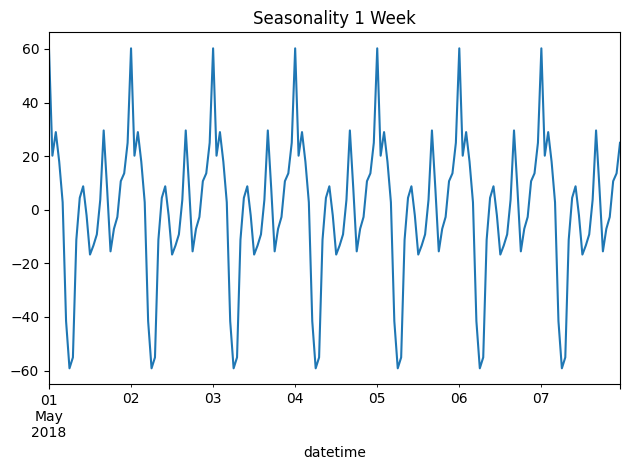

In [12]:
#Seasonality of 1 week

decomposed.seasonal['2018-05-01':'2018-05-07'].plot()
plt.title('Seasonality 1 Week')
plt.tight_layout()
plt.show()

May 1st is a Tuesday. Based on this plot it doesn't seem as though day of the week has much effect on the seasonality of taxi orders as it seems to spike and fall in a similar pattern through each day.  Lets breakdown a day next.

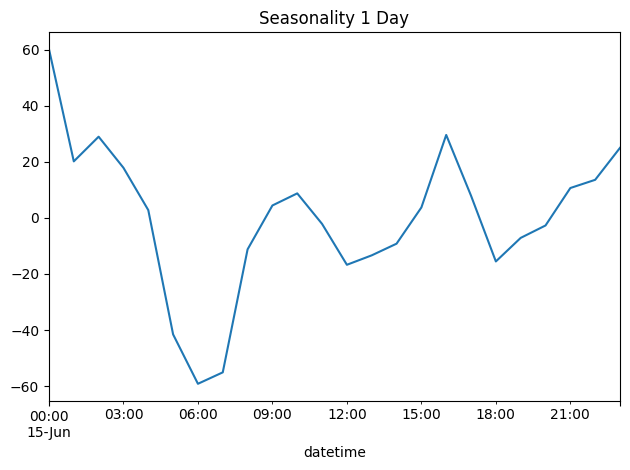

In [13]:
#Seasonality of 24 hour period

decomposed.seasonal['2018-06-15'].plot()
plt.title('Seasonality 1 Day')
plt.tight_layout()
plt.show()

Here we can see that there seems to be spikes in taxi orders in the very early hours of the morning.  This may be from people who go out and may be drinking to get home safely.  It dips a lot from 3am to about 8am which likely is because a great deal of people are sleeping and are not out and about.  It increases again around rush hour times in the morning as people are starting to go about their day.  Then there is another increase around 3pm to 5pm which may correlate with people getting out of work and drops again sharply around 5 which may be that people are eating dinner.  After 6pm taxi orders seem to increase again gradually likely as people are going out for the evening.

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Makes sense! 

</div>

## Training

Now we will train different models and adjust their hyperparameters to determine what model will best predict how many taxi drivers will be needed for the next hour.  First, we'll add calendar features, a rolling mean feature and lag features. Then we will split our data into our training and data sets and begin training different models

In [14]:
# calendar features
df['month'] = df.index.month
df['day'] = df.index.day
df['dayofweek'] = df.index.dayofweek
df['hour'] = df.index.hour

# adding the rolling mean feature
df['rolling_mean'] = df['num_orders'].shift().rolling(7).mean()

#adding lag features
for lag in range(1, 4):
        df['lag_{}'.format(lag)] = df['num_orders'].shift(lag)

In [15]:
df.head()

,num_orders,month,day,dayofweek,hour,rolling_mean,lag_1,lag_2,lag_3
datetime,,,,,,,,,
2018-03-01 00:00:00,124,3,1,3,0,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,3,1,3,1,NaN,124.0,NaN,NaN
2018-03-01 02:00:00,71,3,1,3,2,NaN,85.0,124.0,NaN
2018-03-01 03:00:00,66,3,1,3,3,NaN,71.0,85.0,124.0
2018-03-01 04:00:00,43,3,1,3,4,NaN,66.0,71.0,85.0


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
    
Correct. Sometimes we can notice autocorrelation in time series. It means that the current value of the series depends on the previous values. Including so-called lag components allows machine learning models, such as linear regression, to take this dependency into account. Since we have daily seasonality, introducing larger lags may also be a good idea. 


It is also good that you shift the data when introducing the rolling mean to avoid data leakage.

</div>

In [16]:
#drop rows with missing values
df=df.dropna()
df.head()

,num_orders,month,day,dayofweek,hour,rolling_mean,lag_1,lag_2,lag_3
datetime,,,,,,,,,
2018-03-01 07:00:00,15,3,1,3,7,58.142857,12.0,6.0,43.0
2018-03-01 08:00:00,34,3,1,3,8,42.571429,15.0,12.0,6.0
2018-03-01 09:00:00,69,3,1,3,9,35.285714,34.0,15.0,12.0
2018-03-01 10:00:00,64,3,1,3,10,35.000000,69.0,34.0,15.0
2018-03-01 11:00:00,96,3,1,3,11,34.714286,64.0,69.0,34.0


In [17]:
#Split our data so that 10% of it is our test set

train, test = train_test_split(df, shuffle=False, test_size=0.10)

#confirm data was split chronilogically for proper model building
print(train.index.min(), train.index.max())
print(test.index.min(), test.index.max())

2018-03-01 07:00:00 2018-08-13 14:00:00
2018-08-13 15:00:00 2018-08-31 23:00:00


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Correct. Working with time series, we should not shuffle the data. 
    
</div>
<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b>   Reviewer's comment  </b>
    
    
Ideally, we should split data into 3 subsets, not 2. We first need to train all models, then we compare their RMSE on validation subset, choose the best model based on their validation RMSE, and only then we use the test subset, conducting the final test on the test subset using the best model. 


</div>


In [18]:
target_train = train['num_orders']
features_train = train.drop(columns = ['num_orders'])
target_test = test['num_orders']
features_test = test.drop(columns = ['num_orders'])

features_train.head()

,month,day,dayofweek,hour,rolling_mean,lag_1,lag_2,lag_3
datetime,,,,,,,,
2018-03-01 07:00:00,3,1,3,7,58.142857,12.0,6.0,43.0
2018-03-01 08:00:00,3,1,3,8,42.571429,15.0,12.0,6.0
2018-03-01 09:00:00,3,1,3,9,35.285714,34.0,15.0,12.0
2018-03-01 10:00:00,3,1,3,10,35.000000,69.0,34.0,15.0
2018-03-01 11:00:00,3,1,3,11,34.714286,64.0,69.0,34.0


As our p-value is less than 0.05 we can be fairly confident that our data is stationary.  This can give us some insight on what models may work best.

In [19]:
#Forecast Accuracy as a sanity check

print('Median Number of Taxis ordered:', test['num_orders'].median())

pred_previous = test.shift()
pred_previous.iloc[0] = train.iloc[-1]
print('RMSE:',mse(test, pred_previous)**0.5)

Median Number of Taxis ordered: 135.0
RMSE: 39.488576435773886


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Good idea!     
</div>

In [20]:
#Linear Regression

lr_model = LinearRegression()
lr_model.fit(features_train, target_train)
predicted_train = lr_model.predict(features_train)

print("LR RMSE:", mse(target_train, predicted_train) ** 0.5)

LR RMSE: 30.527398923698314


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Linear Regression is a good start, well done! 
    
</div>
<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    

    

Since you're using Linear Regression, I suggest encoding categorical features such as `day` and `day_of_week` to avoid confusing the model, which might assume that the third day is three times more important than the first one. You will need to do it after you split the data. 
    
    
    
    
Please note that `OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)` or `OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)` are generally more robust than `get_dummies` because they can handle situations where test subset has features that were not available during training. [Difference between OneHotEncoder and get_dummies](https://pythonsimplified.com/difference-between-onehotencoder-and-get_dummies/). 
    
    
    
For tree-based models, `OrdinalEncoder` is a better choice because of computational cost. For boosting algorithms, we can rely on internal encoders that usually perform even better than external ones. For `CatBoost`, this is controlled by the `cat_features` parameter. For `LightGBM`, you can convert categorical features to the category type, allowing the model to handle them automatically.
    
    
By the way, `OrdinalEncoder()` should not be used with linear models if there's no ordinal relationship. [How and When to Use Ordinal Encoder](https://leochoi146.medium.com/how-and-when-to-use-ordinal-encoder-d8b0ef90c28c).


 </div>




Our LR regression model does well with the data and has a good RMSE that is lower than our sanity check and is under our threshold

In [21]:
#AR Model

# find optimal number of lags
mod = ar_select_order(endog=train['num_orders'], maxlag=30)
ar_order = mod.ar_lags

# create AR model and fit it using the training set
ar_model = AutoReg(train['num_orders'], lags=ar_order, seasonal= True)
ar_model = ar_model.fit()

# make predictions
start_value = len(train)
end_value = len(train) + len(test) - 1
ar_pred = ar_model.predict(start=start_value, end=end_value, dynamic=False)

RMSE_AR = mse(test['num_orders'], ar_pred)**0.5
print('AR RMSE:', RMSE_AR)

AR RMSE: 70.42929836663151


<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Very good! 

</div>

For our AR model we focused on the hyperparameters for number of lags and seasonality.  When I left out the seasonality hyper parameter the RMSE was even higher.  We can see this model likely isn't the best fit based on our plot and the fact that the RMSE is higher than our sanity check and our LR model

In [22]:
#MA Model

# find best MA model order
res = arma_order_select_ic(y=train['num_orders'], max_ar=0, max_ma=12)
ma_order = res.bic_min_order[1] # extract MA order from res

# create and fit MA model
ma_model = ARIMA(train['num_orders'], order=(0, 0, ma_order)) # pass order values for MA
ma_model = ma_model.fit()

# make predictions
start_value = len(train)
end_value = len(train) + len(test) - 1
ma_pred = ma_model.predict(start=start_value, end=end_value, dynamic=False)

# calculate MSE of predictions
RMSE_MA = mse(test['num_orders'], ma_pred)**0.5
print('MA RMSE:', RMSE_MA)

MA RMSE: 84.93356836971371


As we can see the MA model does not suit our data very well at all. This is because, the average throughout our data is relatively unchanged, but there are many peaks and dips in our data that the rolling mean can overlook. The RMSE is much higher than our LR model and is higher than our AR model as well. 

In [23]:
#ARMA Model

# set AR and MA orders utilizing the best order models we found above
ar_order_arima = max(ar_order)
ma_order = res.bic_min_order[1]
arma_full_order = (ar_order, 0, ma_order)

# create and fit ARMA model
arma_model = ARIMA(train['num_orders'], order=arma_full_order)
arma_model = arma_model.fit()

# make predictions
start_value = len(train)
end_value = len(train) + len(test) - 1
arma_pred = arma_model.predict(start=start_value, end=end_value, dynamic=False)

# calculate MSE of predictions
RMSE_ARMA = mse(test['num_orders'], arma_pred)**0.5
print('ARMA RMSE:', RMSE_ARMA)

/.venv/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARMA RMSE: 76.67395028570958


After training the different kinds of Time Series Models, it seems that our LR model gives us the best ability to predict how many drivers will be needed based on the time.  Because this regression model seems to be better than our time series models, I want to try a booster regressor model to see if we can further improve our RMSE.

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Good! 
</div>
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
These models, however, may require thorough tuning. Using seasonal model may also help to improve the metric.     
</div>

In [24]:
#LGBM Model
import lightgbm as lgb

lg_model = lgb.LGBMRegressor(random_state=99)
lg_model.fit(features_train, target_train)
predicted_train = lg_model.predict(features_train)

print("LGBM Training RMSE:", mse(target_train, predicted_train) ** 0.5)

LGBM Training RMSE: 15.259811454459797


Adding the booster significantly improved our RMSE to well below our threshold of 48. This model is very acurate in predicting based on our training set and is efficient to use. 

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Pretty decent result. 
</div>
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Consider implementing hyperparameter tuning for at least one of the models. 
    
</div>

## Testing

Now we will use our LGBM model to make predictions with our test set and compare our predictions to the actual result. 

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment  </b>
    
    
Correct, here we test the best model. 
    
</div>

In [25]:
final_lg_model = lgb.LGBMRegressor(random_state=99, n_estimators=30)
final_lg_model.fit(features_train, target_train)
predicted_test = final_lg_model.predict(features_test)

print("Test RMSE:", mse(target_test, predicted_test) ** 0.5)

Test RMSE: 47.7385401147567


<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment  </b>
    
    
Good!     
</div>

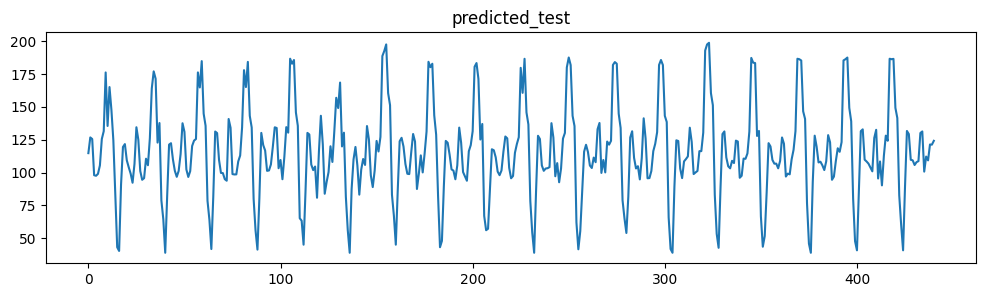

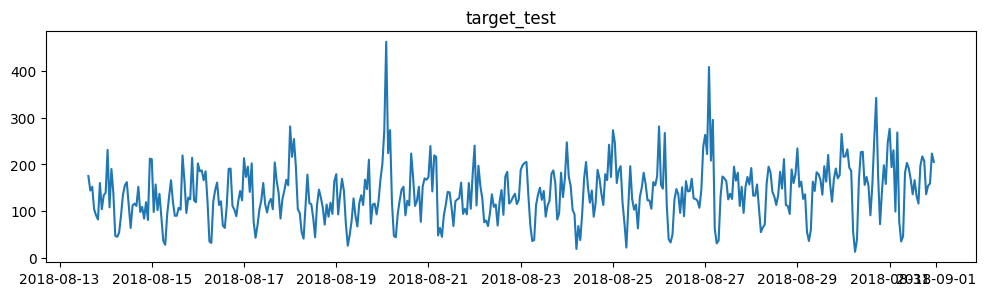

In [26]:
plt.figure(figsize=(12, 3))
plt.title('predicted_test')
plt.plot(predicted_test)
plt.show()

plt.figure(figsize=(12, 3))
plt.title('target_test')
plt.plot(target_test)
plt.show()

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    

    
It's great that you visualize the results! 
    
</div>
<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    

    
Consider displaying graphs on one chart.     
</div>

As we can see, when we applied this model to our test set it wasn't quite as accurate as with our training set.  This is likely due to the few sharp peaks that still exist in our data, but overall the pattern of our predicted test results is similar to that of our target.  Therefore, this LGBM Regression Model is excellent to use to predict when more taxi drivers will be needed as it is accurate (with a RSME below our threshold of 48) and runs quickly, so it can efficiently predict when those drivers will be needed.

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Excellent job, thank you so much! 
    
</div>


# Review checklist

- [x]  Jupyter Notebook is open
- [ ]  The code is error-free
- [ ]  The cells with the code have been arranged in order of execution
- [ ]  The data has been downloaded and prepared
- [ ]  The data has been analyzed
- [ ]  The model has been trained and hyperparameters have been selected
- [ ]  The models have been evaluated. Conclusion has been provided
- [ ] *RMSE* for the test set is not more than 48